### 평가 지표 및 측정
- 평가지표 선택
    - 최종 목표를 기억하라 - 응용의 고차원적 목표인 비즈니스 지표 <br>(어떤 머신러닝 응용에서 특정 알고리즘을 선택하여 나타난 결과를 비즈니스 임팩트라고 함)
- 이진 분류의 평가 지표에서 고려사항
    - 에러의 종류 : false pos, false neg 오류 고려. 의학 진단에서 false neg는 최대한 피해야하며 flase pos는 중요도가 낮음
    - 불균형 데이터 셋 : 두 종류의 오류 중 하나가 다른 것보다 훨씬 많을때 중요

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 42)

In [2]:
# 9가 아님을 예측값으ㅗ 내놓은 DummyClassifier를 사용하여 정확도를 계산
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_freq = dummy_majority.predict(X_test)

print('예측된 레이블의 고유값 : ', np.unique(pred_most_freq))
print('테스트 정수 : {:.2f}'.format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값 :  [False]
테스트 정수 : 0.89


- 거의 아무것도 학습하지 않고 90% 정확도
- 문제에 따라서 그저 한 클래스만을 예측하기만 해도 될 수 있다.

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print('테스트 점수  : {:.2f}'.format(tree.score(X_test, y_test)))

테스트 점수  : 0.92


- 정확도로만 보면 DecisionTreeClassifier가 DummyClassifier 보다 낫다.

In [5]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수 : {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 점수 : 0.89
logreg 점수 : 0.98


- 무작위로 예측하는 DummyClassifier는 결과가 안 좋습니다.
- ==> imbalanced datasets에서 예측 성능을 정량화하는데 정확도는 적절한 측정 방법이 아니기 때문입니다.

*오차행렬 (Confusion Matrices)*

In [7]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬 : \n', confusion)
print('logreg 점수 : 0.98 ==', '(400+43)/450 = {:.2f}'.format((400+43)/450))

오차 행렬 : 
 [[400   2]
 [  5  43]]
logreg 점수 : 0.98 == (400+43)/450 = 0.98


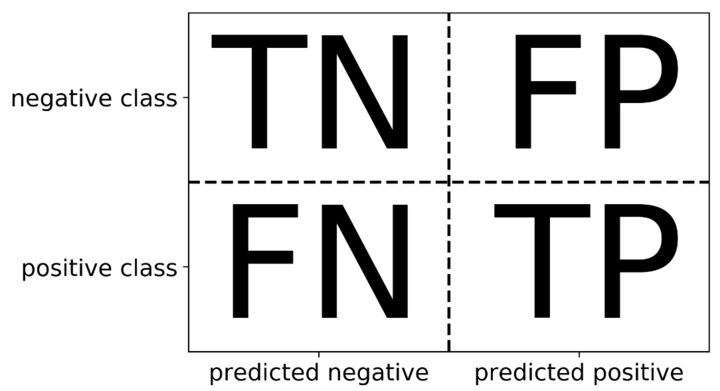

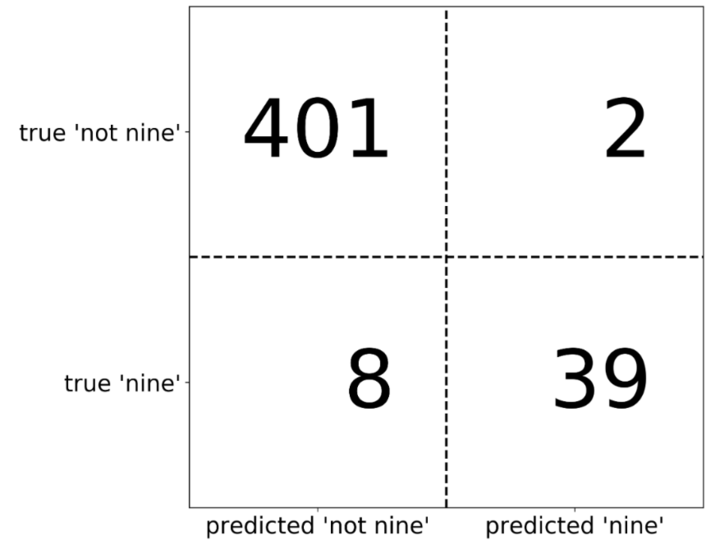

- Accuracy 
    - 가장 많이 쓰이는 것 : 모든 T를 전부 더하고 전체 갯수로 나눈 것
    - 모든 데이터에 대해 클라스 라벨을 얼마나 잘 맞췄는지를 계산

- Confusion Matrix
    - 모델의 목적에 맞게 분류모델을 평가하여야한다. 병의 진단시, FP와 FN은 둘 다 에러지만 둘의 Risk는 다르다
    - 오차 행렬은 이진 분류 평가 결과를 나타낼때 가장 널리 사용하는 방법 중 하나다.
    - False Positive, False Negative, True Positive, True Negative
    - 정확도 : (TN+TP)/(TN+TP+FN+FP)
    - 정밀도 : TP/(FP+TP)
    - 재현율(Recall) : TP/(FN+TP)
        - 암환자, 보험사기
- F1 score 
    - 데이터가 밸런스하지 않을 때 잘 예측함
    - 정밀도도 중요하고 재현율도 중요한데 둘 중 무엇을 쓸지 고민
    - 이 두 값을 조화 평균 내서 수치로 나타낸 지표

In [8]:
print('빈도 기반 더미 모델 : ')
print(confusion_matrix(y_test, pred_most_freq))
print('\n결정트리 : ')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀 : ')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델 : 
[[402   0]
 [ 48   0]]

결정트리 : 
[[376  26]
 [ 12  36]]

로지스틱 회귀 : 
[[400   2]
 [  5  43]]


#### 정확도와의 관계
* 정확히 예측한 수 TP + TN 을 전체 샘플 수로 나눈 것이다.
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}
#### 정밀도, 재현율, f-점수
* 오차 행렬의 결과를 요약하는 여러 방법 중 가장 일반적인 것은 **정밀도(precision)과 재현율(recall)** 이다.
\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}
* **재현율**은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용한다. 즉 거짓 음성(FN)을 피하는 것이 중요할 때다. 재현율을 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR) 이라고도 한다.
\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}
* 정밀도와 재현율의 조화 평균인 f-점수(f-score) 또는 f-측정(f-measure)은 이 둘을 하나로 요약해준다. 특별히 이 공식을 f1-점수라고도 한다. 어떤 모델이 좋은지 직관적으로 판단하는 데는 정확도보다 f1-점수가 낫다. 그러나 f1-점수는 정확도보다 이해하거나 설명하기 어렵다는 게 단점이다.

In [9]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_most_freq)))
print('트리 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score : 0.00
트리 모델의 f1 score : 0.65
로지스틱 회귀 모델의 f1 score : 0.92


#### 업무에 따른 재현율과 정밀도의 상대적 중요도
- 재현율이 산대적으로 더 중요한 지표인 경우 실제 Positive데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    - 암진단, 금융사기 판별
- 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative인데 데이터 예측을 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 
    - 스팸메일

##### 정밀도 - 재현율 곡선
- 모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 정밀도와 재현율의 상충 관계를 조정하는 일
- 양성 샘플의 실수(FN)을 10% 보다 작게 하여 90%이상 재현율
    - 임계값은 비즈니스 목표에 따라 결정됨 - 운영 포인트 (operating point)
    - 이 임계값을 유지하면서 적절한 정밀도를 내는 모델을 만드는 일이 어려움
- 이럴 때 정밀도-재현율 곡선 (Precision-Recall Curve)를 그려 정밀도와 재현율의 모든 점을 살펴봄
- sklearn.metrics모듈에서 곡선 함수 제공

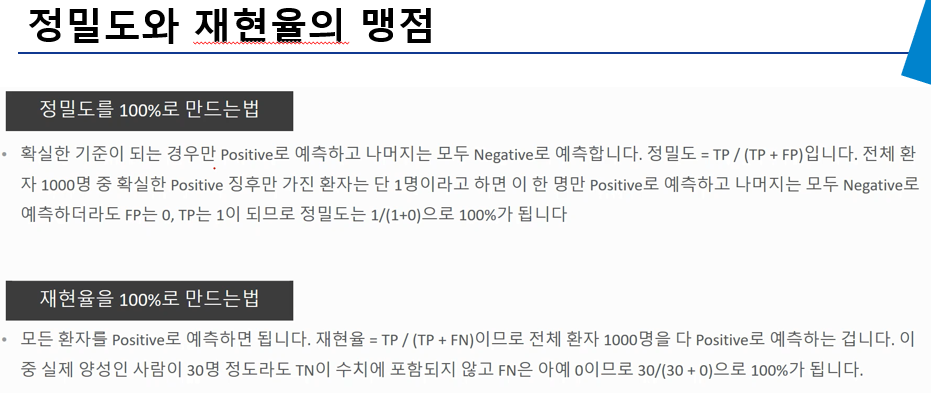

#### ROC 곡선과 AUC
- ROC(Receiver-Operation-Characteristic) curve와 이에 기반한 AUC스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
- 민감도와 특이도가 서로 어떤 관계를 가지며 변하는지를 2차원 평면상에 표현
- ROC curve가 그려지는 곡선으 의미하고, AUC(Area Under Curve)는 ROC curve의 면적을 뜻한다. ***AUC값이 1에 가까울 수록 좋은 모델!***

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_freq, target_names = ['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.89      1.00      0.94       402
           9       0.00      0.00      0.00        48

    accuracy                           0.89       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.89      0.84       450



c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
print(classification_report(y_test, pred_logreg, target_names = ['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       402
           9       0.96      0.90      0.92        48

    accuracy                           0.98       450
   macro avg       0.97      0.95      0.96       450
weighted avg       0.98      0.98      0.98       450



### 모델 선택에서 평가지표 사용하기
- scoring 매개변수 옵션
    - accuracy - 정확도
    - roc_curve - ROC곡선 아래 면적
    - average_recision - 정밀도-재현율 곡선의 아래 면적
    - f1_macro, f1_weighted, f1_micro - f1 가중치 방식
    - R2 -회귀에서 널리 사용하는 R2 점수
    - mean_squared_error/mean_absolute_error - 평가제곱/절댓값오차

### 회귀의 평가지표
- 분류와 비슷하세 사용 가능
    - 타겟을 과대 예측한 것 대비 과소 예측한 것 분석
- 대부분의 응용은 score 메소드의 R2계산으로 충분
- 가끔 평균 제곱 에러 또는 평균 절댓값 에러를 사용하여 비즈니스 결정